### Откройте файл с данными и изучите общую информацию

<div class="alert alert-block alert-info">
<b>✔</b> 
</div>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучим информацию о данных:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовьте данные

Видим, что в названиях столбцов встречаются буквы в верхнем и нижнем регистре. Сделаем все в нижнем для удобства:

In [3]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим строки на явные дубликаты:

In [4]:
data.duplicated().sum()

0

Проверим данные на отсутствующие значения:

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим в процентах на отсутствующие значения:

In [6]:
data.isnull().sum().sort_values(ascending = False) / data.shape[0] * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Видим, что в столбце с названием игры и жанром есть два отсутствующих значения. Думаю, их надо удалить, потому что без названия игры нам эти данные бесполезны. Пропуски с годом релиза занимают всего 1,6% - их тоже можем удалить.

In [7]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

In [8]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Проверим, пересекаются ли как-то пропущенные значения в оставшихся трех колонках:

In [9]:
data.query('critic_score.isnull() and user_score.isnull() and rating.isnull()').sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12960,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,2013.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16389,ef - a fairy tale of the two.,PS2,2010.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12190,everGirl,GBA,2005.0,Adventure,0.05,0.02,0.00,0.00,NaN,NaN,NaN
16511,th!nk Logic Trainer,Wii,2009.0,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что общего признака отсутствия значений в этих колонках не наблюдается.

В оставшихся трех колонках слишком много отсутствующих значений. Если мы их на что-то поменяем, то статистика будет искажена. Проверим, сколько уникальных значений в каждой из них:

In [10]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [11]:
data.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
2.3       2
0.7       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Самое большое количество у странного значения tbd, которое не является числом, как должно быть в этом столбце. Гугл нам ответил, что это значение - To be determined - подлежит определению. Его применяют в тех случаях, когда разработкой занимаются несколько человек/команд, и одна ветка еще не доработана. Это значит, что это значение нам удалять точно нельзя, как и заменять его на '0', потому что '0' может быть реальной оценкой. Нам нужно заменить его на какое-то значение, которое точно никогда не может встретиться, чтобы понимать, что оно ненастоящее/временное. Например, -5. То же самое сделаем и для отсутствующих значений в столбцах user_score и critic_score:

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
data['user_score'] = data['user_score'].replace('tbd', '-5') #когда загрузятся реальные значения, то tbd уже не будет встречаться
data['user_score'] = data['user_score'].fillna(-5) #после загрузки tbd останутся -5 только в отсутствующих по другим причинам значениях
data['critic_score'] = data['critic_score'].fillna(-5)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [15]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Значения в столбце с рейтингом текстовые, в формате `object`, поэтому заменить отсутствующие значения на число будет некорректно. Заменим их на значение 'unknown' (неизвестный).

In [16]:
data['rating'] = data['rating'].fillna('unknown')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь можем поменять тип данных:

In [17]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [18]:
data['sales_total'] = data.loc[:, ['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5,-5.0,unknown,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5,-5.0,unknown,40.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-5,-5.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-5,-5.0,unknown,0.02
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-5,-5.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-5,-5.0,unknown,0.01


### Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим сводную таблицу по году выпуска и просуммируем количество выпускаемых игр в каждый год и, для наглядности, сразу построим график:

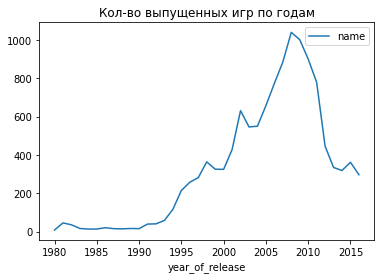

In [20]:
games_per_year = (
    data[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
        .plot(title = 'Кол-во выпущенных игр по годам')
)

<div class="alert alert-block alert-info">
<b>✔</b> 
</div>

Из графика видно, что расцвет игровой индустрии пришелся на период с 2005 по 2010 годы. До 1994 года игр выпускалось мало и, думаю, что этот период не так важен для анализа, потому что много современных технологий в те годы просто не существовали и индустрии, в целом, в таком виде, как сейчас, еще не существовало.

#### Посмотрите, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала выберем платформы по суммарным продажам:

In [25]:
sales_total_per_platform = (data.groupby(['platform'], as_index = False)['sales_total'].sum()
                                .sort_values('sales_total', ascending = False))
sales_total_per_platform

,platform,sales_total
16,PS2,1566.19
17,PS3,1258.55
28,X360,1229.56
26,Wii,1149.50
4,DS,991.19
15,PS,939.97
18,PS4,455.23
13,PC,396.13
6,GBA,387.47
19,PSP,355.15


Для наглядности построим график по этим данным:

<AxesSubplot:title={'center':'Кол-во продаж по платформам'}, xlabel='platform'>

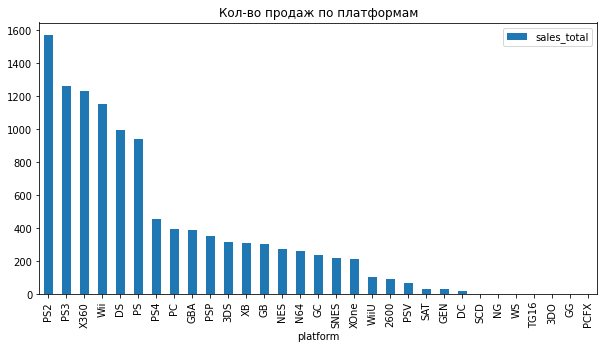

In [29]:
sales_total_per_platform.plot(kind='bar', x='platform', y='sales_total', figsize = (10, 5), title = 'Кол-во продаж по платформам')

Из графика видно, что максимальные суммы продаж у PS2 и PS3. Выберем для анализа первые 6 ярко-выраженных пиков: PS2, PS3, X360, Wii, DS, PS.

In [27]:
top_6_per_years = sales_total_per_platform.head(6)['platform'].tolist()
#top_6_per_years = sales_total_per_platform.sort_values(by=['platform'].head(5))
top_6_per_years

['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS']

Теперь строим сводную и график по годам для каждой игры из нашей ТОП-6:

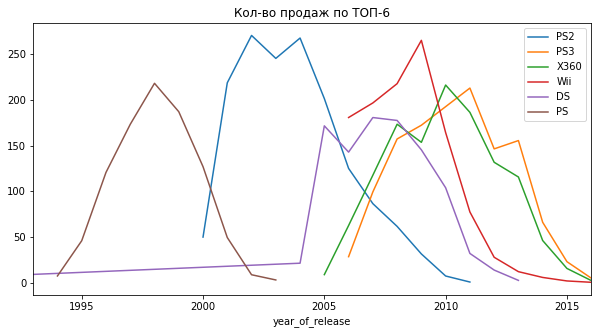

In [33]:
for index in top_6_per_years:
    (data.query('platform == @index and year_of_release != -5')
         .pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc = 'sum')
         .sort_values('year_of_release', ascending = False)['sales_total']
         .plot(figsize = (10, 5), label = index, legend = True, title = 'Кол-во продаж по ТОП-6', xlim = (1993, 2016))
    )

<div class="alert alert-block alert-info">
<b>✔</b> 
</div>

По графику мы видим, что первая PS вышла в 1994 году и набрала популярность около 1999 года, вторая версия вышла через 5 лет и была популярна тоже около пяти лет. То же самое можно сказать и про  Wii и DS. Из чего мы можем сделать вывод, что актуальным периодом для нас будет последние 5 лет, за которые вышли новые платформы или те, которые пока еще популярны. То есть это данные с 2012 года.

<AxesSubplot:title={'center':'Кол-во продаж по платформам с 2012г.'}, xlabel='platform'>

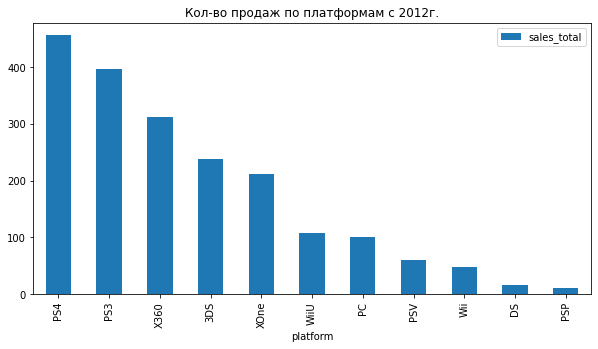

In [36]:
platforms_actual = data.query('year_of_release >= 2012')
platforms_actual_top = (platforms_actual
                         .groupby(['platform'],as_index = False)['sales_total']
                         .sum()
                         .sort_values('sales_total', ascending = False)
                           )
platforms_actual_top.plot(kind = 'bar', x = 'platform', y = 'sales_total',figsize = (10, 5), title = 'Кол-во продаж по платформам с 2012г.')

Выделили за актуальный период лидеров продаж. Теперь посмотрим в разрезе по годам как изменяются продажи.

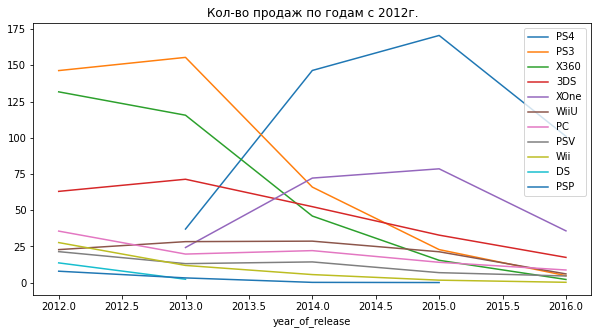

In [38]:
platforms_lead = platforms_actual_top['platform'].tolist()
for index in platforms_lead:
    (platforms_actual.query('platform == @index')
                     .pivot_table(index = 'year_of_release', values = 'sales_total', aggfunc = 'sum')
                     .sort_values('year_of_release', ascending = False)['sales_total']
                     .plot(figsize=(10, 5), label = index, legend = True, title = 'Кол-во продаж по годам с 2012г.')
    )

Из графика видно, что у всех платформ снижаются продажи. У лидеров рынка - PS4 и XOne - снижение уровня продаж началось позже остальных, с 2015 года, но мы помним из условия, что данные за 2016 год могут быть неполными, так что, вполне вероятно, после дополнения данных, там тоже будет рост. Можем считать их потенциально прибыльными.

In [ ]:
platforms_actual

In [39]:
platforms_potential = platforms_actual.query('platform == "PS4" or platform == "XOne"')
platforms_potential_group = (platforms_potential
                       .groupby(['platform', 'year_of_release'], as_index = False)['sales_total'].sum()
                       .sort_values('platform', ascending = False)
                           )
platforms_potential_group

,platform,year_of_release,sales_total
4,XOne,2013,24.30
5,XOne,2014,72.22
6,XOne,2015,78.61
7,XOne,2016,35.78
0,PS4,2013,37.04
1,PS4,2014,146.50
2,PS4,2015,170.66
3,PS4,2016,101.03


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

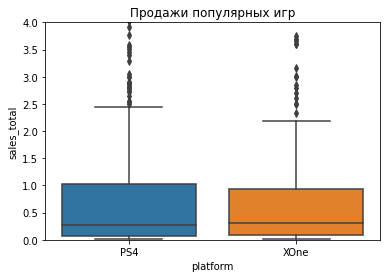

In [44]:
ax = sns.boxplot(x = 'platform', y = 'sales_total', data = platforms_potential)
ax.set(ylim = (0, 4), title = 'Продажи популярных игр');

Из графика видим, что у обоих платформ в среднем получается около 1 млн. проданных копий. Чтобы увидеть более точные значения посмотрим в таблицу:

In [45]:
platforms_potential.query('platform == "PS4"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,44.558673,2.702296,1.161301
std,0.868181,0.583723,0.810843,0.069101,0.254825,38.315111,5.712921,2.397631
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,-5.000000,-5.000000,0.070000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,64.500000,6.100000,0.280000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,77.000000,7.500000,1.022500
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,20.490000


In [46]:
platforms_potential.query('platform == "XOne"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,48.591093,3.489474,0.853887
std,0.952995,0.630618,0.365306,0.005153,0.094221,38.019983,5.219909,1.373632
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,-5.000000,-5.000000,0.080000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,67.000000,6.000000,0.300000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,79.000000,7.200000,0.935000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,9.500000


У PS4 среднее количество проданных копий - 1,37 млн, а у XOne - 0,85 млн. Но максимальное количество проданных копий у PS4 почти в два раза больше. Возможно, этот выброс зависит от какой-то конкретной топовой игры. Эти максимальные значения могут сильно портить наше среднее, а вот если смотреть на медиану, то у обоих платформ она почти одинаковая, и у PS4 она даже меньше (0,28млн.), чем у XOne (0,3млн.).

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.**

Чтобы посмотреть зависимость, нам нужно посмотреть на коэффициент корреляциии. Для этого мы сначала разделим наши платформы на два отдельных среза:

In [80]:
ps4 = platforms_potential.query('platform == "PS4" and user_score != -5 and critic_score != -5 and sales_total != -5')      
xone = platforms_potential.query('platform == "XOne" and user_score != -5 and critic_score != -5 and sales_total != -5')

Изучим PS4:

In [81]:
feedback = ['user_score', 'critic_score', 'sales_total']
ps4[feedback].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.557654,-0.040030
critic_score,0.557654,1.000000,0.389265
sales_total,-0.040030,0.389265,1.000000


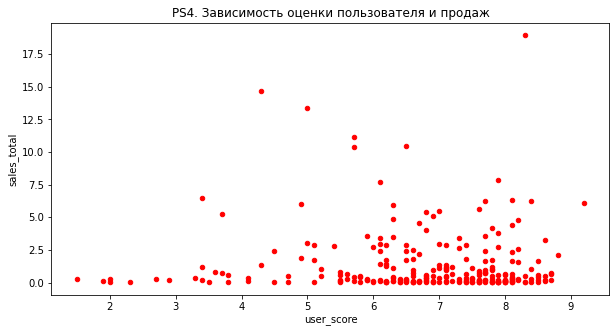

In [82]:
(ps4
     .plot(kind='scatter', x='user_score', y='sales_total', 
     title='PS4. Зависимость оценки пользователя и продаж', figsize = (10, 5), color = 'red')
);

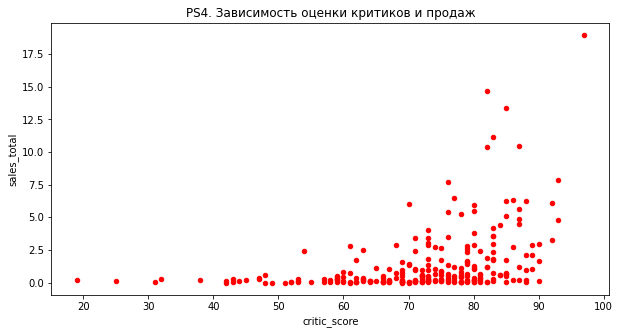

In [83]:
(ps4
     .plot(x = 'critic_score', y = 'sales_total', 
           kind='scatter', title='PS4. Зависимость оценки критиков и продаж', 
           figsize = (10, 5), color = 'red')
);

Изучим XOne:

In [84]:
xone[feedback].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.472462,-0.091516
critic_score,0.472462,1.000000,0.411427
sales_total,-0.091516,0.411427,1.000000


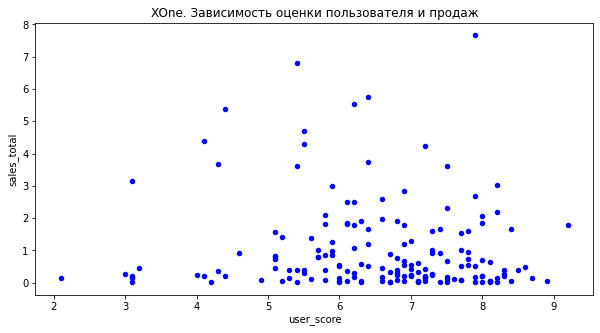

In [85]:
(xone
    .plot(x = 'user_score', y = 'sales_total', 
          kind='scatter', title='XOne. Зависимость оценки пользователя и продаж', 
          figsize = (10, 5), color = 'blue')
);

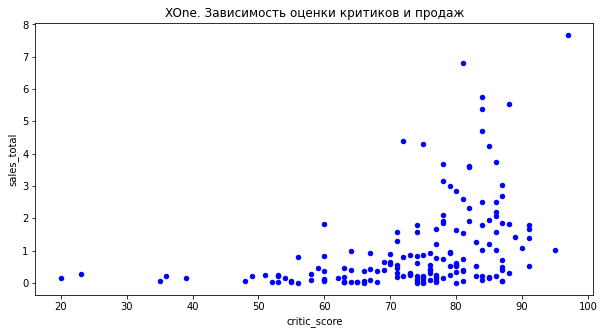

In [86]:
(xone
    .plot(x = 'critic_score', y = 'sales_total', 
    kind='scatter', title='XOne. Зависимость оценки критиков и продаж', 
    figsize = (10, 5), color = 'blue')
);

У обеих платформ мы видим, что коэффециенты Пирсона ближе к '0', чем к единице, из чего можно сделать вывод, что отзывы критиков и пользователей почти никак не влияют на продажи. Вполне возможно, что это связано с предыдущим опытом пользователей, у которых есть кредит доверия к платформе, за счет которого они готовы приобретать новые продукты. То есть пользователь будет опираться больше на свой опыт и впечатления, чем на отзывы. Глядя на графики мы видим, что зависимость продаж от отзывов критиков есть, но нельзя точно утверждать, что эта зависимость линейная. Зато мы видим единогласность отзывов пользователей и отзывов критиков - у них коэффициент корреляции почти =1. 

**Посмотрите на общее распределение игр по жанрам.**

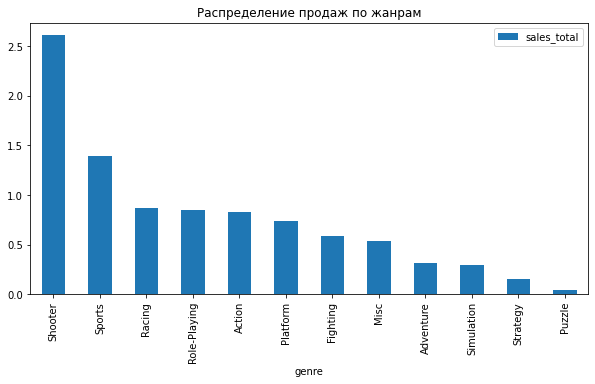

In [89]:
(platforms_potential
    .pivot_table(index = 'genre', values = 'sales_total')
    .sort_values('sales_total', ascending = False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), title = 'Распределение продаж по жанрам')
    );

Из графика видно, что с большим отрывом в продажах лидируют шутеры. К самым прибыльным я бы еще отнесла Спорт и, с почти одинаковым количеством продаж: Гонки, ролевые игры и экшены. Меньше всего продаж у пазлов. Было бы странно покупать себе дорогую игровую консоль для того, чтобы собирать пазлы, чаще их можно пособирать и бесплатно и, вполне вероятно, это можно отнести к детскому развивающему контенту. То есть, в пазлы играют дети тех детей постарше, кто играет в шутеры:)

### Составьте портрет пользователя каждого региона

In [90]:
regions = ['na_sales','eu_sales','jp_sales']

**Самые популярные платформы (топ-5)**

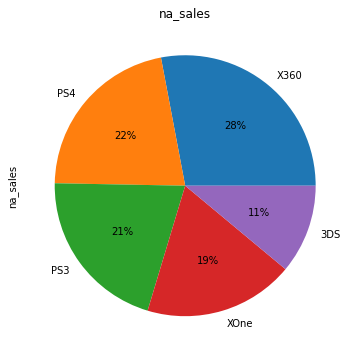

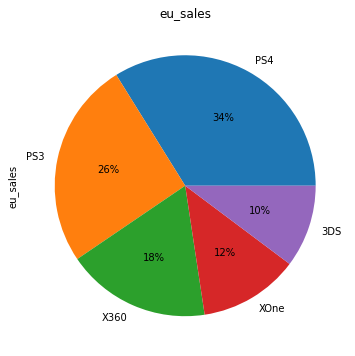

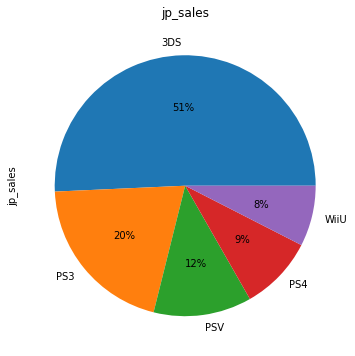

In [125]:
#fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3)

for index in regions:
    (platforms_actual.
     pivot_table(index = 'platform', values = index, aggfunc='sum')
     .sort_values(index, ascending=False).head(5)
     .plot(kind='pie', autopct='%1.0f%%', y = index, figsize=(6, 6), legend = False, title = index)
    )

Для Северной Америки самой популярной платформой является X360,

Для Европы - PS4,

А в Японии с большим отрывом - 3DS, а вот PS4 там совсем не популярна (в разрезе топ-5). 

Кроме того, в Японии в топ-5 просочились WiiU и PSV, которых не было в выборке по Европе и Америке. Заглянув в гугл мы видим, что 3DS и WiiU - это Nintendo, который произведен в Японии. Правда PlayStation тоже японские, но на Родине почему-то не прижились. Есть версия, что Нинтендо может выезжать за счет всякого рода портативных устройств, что в условиях Японии более актуально, но возможно и нет. 

Из всего вышесказанного можно сделать вывод о том, что самыми патриотичными пользователями являются американцы и японцы, пора европейцам (в т.ч. нам) придумать что-то свое.

**Самые популярные жанры (топ-5)**

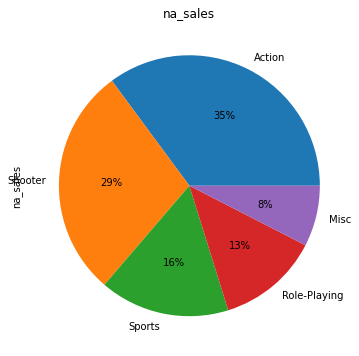

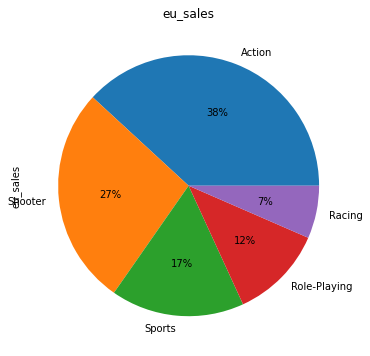

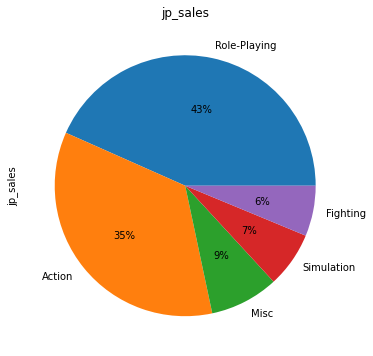

In [127]:
for index in regions:
    (platforms_actual
         .pivot_table(index = 'genre', values = index, aggfunc='sum')
         .sort_values(index, ascending=False).head(5)
         .plot(kind='pie', autopct='%1.0f%%', y = index, figsize=(6, 6), legend = False, title = index)
    )

В Северной Америке любят стрелялки и экшены, причем не только в играх. Европа чуть более миролюбива, но вот до Японцев нам всем еще очень далеко.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [ ]:
for index in regions:
    (platforms_actual
         .pivot_table(index = 'rating', values = index, aggfunc='sum')
         .sort_values(index, ascending=False).head(5)
         .plot(kind='pie', autopct='%1.0f%%', y = index, figsize=(6, 6), legend = False, title = index)
    )

Мы видим, что организация ESRB не очень любит Японию. И правда:

_"Негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде."(с)_

Тем не менее она умудрилась присвоить рейтинги тем играм, которые (по всей видимости) выходят одновременно на американо-европейских континентах и в Японии. Уж очень японский блин коррелирует с популярностью платформ в этой загадочной стране.

Из приведенных графиков рисуются следующие портреты пользователей:
- В Северной Америке в основном играют люди категории М (17+) и Е (все) в шутеры и экшены преимущественно на Xbox от Microsoft.
- В Европе те же самые люди играют в то же самое, только на PlayStation.
- В Японии же какие-то непонятные люди играют на чем-то своем в ролевые игры:) ох уж эти японцы!

### Проверьте гипотезы

Для проверки гипотез нам подходит метод `st.ttest_ind`, потому что для сравнения мы берем две независящие друг от друга выборки и сравниваем их среднее.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Выделим две выборки для сравнения:

In [128]:
xbox = platforms_actual.query('platform == "XOne" and user_score != -5')
pc = platforms_actual.query('platform == "PC" and user_score != -5')

print("Дисперсия выборки Xbox One", np.var(xbox['user_score']))
print("Дисперсия выборки PC", np.var(pc['user_score']))

Дисперсия выборки Xbox One 1.8965188383045526
Дисперсия выборки PC 2.7569952398906588


In [131]:
alpha = 0.05

results = st.ttest_ind(
    xbox['user_score'],
    pc['user_score'],
    equal_var=False 
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


P-значение нам говорит о том, что с вероятностью примерно 55% различие рейтингов на этих двух платформах можно получить случайно. Такая пограничная цифра, которую можно трактовать и так, что с почти с таким же процентом различие может быть и не случайным. Поскольку нет никакой однозначности, то нулевую гипотезу не опровергаем и проверяем ее по-человечески:

In [132]:
xbox['user_score'].mean()

6.521428571428572

In [133]:
pc['user_score'].mean()

6.4286407766990274

Такое же небольшое различие, как и в гипотезах. Как гласила нам теория - если не можешь доказать обратное, то оставляй нулевую гипотезу, поэтому считаем, что средние пользовательские рейтинги на этих двух платформах одинаковые.

Проверка гипотезы:

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [134]:
action = platforms_actual.query('genre == "Action" and user_score != -5')
sport = platforms_actual.query('genre == "Sports" and user_score != -5')

print("Дисперсия выборки action",np.var(action['user_score']))
print("Дисперсия выборки sport",np.var(sport['user_score']))

Дисперсия выборки action 1.8854720340439224
Дисперсия выборки sport 3.0073882971729127


In [135]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sport['user_score'],
    equal_var=False,
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


P-значение нам говорит о том, что разница между наблюдаемым и предполагаемым значением достаточно велика, то есть вероятность её получить случайно очень низкая. Проверяем:

In [136]:
action['user_score'].mean()

6.825047801147227

In [137]:
sport['user_score'].mean()

5.455897435897437

Разница в рейтингах, действительно, есть, поэтому мы опровергаем нулевую гипотезу и подтверждаем нашу гипотезу о том, что Средние пользовательские рейтинги жанров Action и Sports разные.

###  Общий вывод

Для того, чтобы планировать рекламные кампании и изучать рынок - необходимо определиться, на какую аудиторию она будет расчитана. То есть, если реклама будет для пользователей из Северной Америки, то лучше всего предлагать им шутеры и экшены на Xbox + таргетировать рекламу и по возрастной категории (тут нужны более тонкие настройки для каждой игры конкретнее).

Для Европы лучше всего планировать рекламу шутеров и экшенов на PS с точно такой же тонкой настройкой возастных категорий на каждую конкретную карточку игры. Если у нас много денег, то можно и на пазлы настраивать таргетку таким образом, чтобы показывали их тем, кто когда-то ими интересовался:).

Для Японии рынок нужно изучить более детально с помощью дополнительных источников. Например, где именно будет проходить эта реклама - наверняка на альтернативных сервисах, которые более популярны в Азии. Изучить особенности этих сервисов. Думаю, что и список названий самих игр, которые будут интересны японской аудитории, тоже надо изучать более детально, а не фигачить только жанры. Аудитория там большая, поэтому упускать этот кусок рынка не хотелось бы, но нужно досконально изучить особенности этого рынка. С пустыми значениями в данных это может обернуться провалом рекламной кампании. Но опираясь на те данные, что у нас есть, мы можем точно сказать, что в Японии лучше всего предлагать Ролевые компьютерные игры и экшены, выпущенные для платформ Nintendo.